# Moringa School Week 8 Independent Project 

# Defining the Question

**1. Specifying the question**

 Use the healthcare datasets provided to accomplish the following:  
 Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

 **Part 1: Decision trees:**
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

**Part 2: SVM:**

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

**2. Defining the metric for success**

f_1 score and accuracy will be the two many attributes that we shall use to check on the accuracy of the models we shall develop. 

**3. Understanding the context**

This project is being done on behalf of the Nairobi Hospital; the hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. We are expected to use the healthcare datasets provided to develop answers to the questions asked. 

**4. Recording the experimental design**

*   Data reading and checking
*   Data tidying 
*   Data Exploration
*   Implementing the solution 
*   Modelling 
*   Challenging the solution
*   Follow Up question
*   Conclusion

**5. Data Relevance**

The data provided has the relevant features needed to carry out the project. 

# Reading the Data

In [ ]:
#Importing Libraries 
#

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df_h = pd.read_csv('hypothyroid.csv')
df_h.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# Checking the Data

In [ ]:
#Previewing the top of our dataset 
#

df_h.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
#Previewing the bottom of our dataset 
#

df_h.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
#Checking the shape of the data
#

df_h.shape

(3163, 26)

In [ ]:
#Checking on the data type 
#

df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# External Data Source Validation

The dataset provided was validated by a valid external source

# Tidying the Dataset

In [ ]:
#Checking for missing values 
#

df_h.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [ ]:
#Checking for duplicates 
#

df_h.duplicated().sum()

77

In [ ]:
#Dropping duplicates 
#

df_h.drop_duplicates(keep='first', inplace = True)


In [ ]:
#Checking if the duplicated values have actually been dropped

df_h.duplicated().sum()

0

In [ ]:
#Checking for unique values 
#

df_h.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [ ]:
#Previewing column specific unique values 
#

df_h['sex'].unique()

array(['M', 'F', '?'], dtype=object)

In [ ]:
df_h['TSH'].unique()

array(['30', '145', '0', '430', '7.30', '138', '7.70', '21', '92', '48',
       '36', '15', '15.30', '25', '61', '28', '170', '54', '216', '56',
       '71', '46', '70', '34', '53', '9.40', '126', '10', '530', '35',
       '65', '57', '125', '23', '80', '117', '49', '66', '8.20', '150',
       '?', '18', '165', '164', '24', '90', '77', '19', '58', '100',
       '213', '17', '235', '153', '13', '31', '109', '260', '43', '12',
       '11', '55', '6.50', '20', '7.50', '14', '60', '140', '33', '8.70',
       '0.25', '10.70', '82', '45', '42', '41', '160', '16', '89', '44',
       '176', '6.40', '183', '29', '37', '39', '7.90', '59', '68', '38',
       '47', '143', '6.60', '288', '96', '0.50', '1.20', '1.90', '0.09',
       '3.10', '0.40', '0.85', '0.30', '0.90', '1.50', '4.60', '0.20',
       '5.80', '4', '1.40', '2', '2.60', '2.90', '0.80', '4.90', '10.30',
       '2.30', '0.70', '0.60', '1.30', '2.50', '5.10', '1.70', '2.70',
       '22', '8.10', '3.30', '5', '3.20', '1.80', '1.10', '0.4

In [ ]:
df_h['T3'].unique()

array(['0.60', '1.70', '0.20', '0.40', '1.20', '1.10', '1.30', '1.90',
       '?', '0.80', '2.20', '1.50', '2.70', '2', '0.30', '2.10', '0.50',
       '0.70', '1', '1.40', '2.30', '2.40', '0.90', '1.80', '0', '2.80',
       '1.60', '6.70', '3.30', '3', '2.50', '2.60', '4', '9.80', '3.90',
       '3.40', '3.80', '4.50', '3.20', '3.70', '4.30', '2.90', '3.10',
       '3.50', '3.60', '6.60', '4.90', '8.90', '4.10', '5', '5.30',
       '7.60', '7.30', '4.20', '4.40', '5.10', '7', '0.10', '0.05',
       '4.70', '6.20', '5.50', '4.60', '6.10', '8.10', '5.20', '5.60',
       '4.80', '10.20', '8.60'], dtype=object)

In [ ]:
df_h['FTI'].unique()

array(['10', '17', '0', '6', '44', '23', '63', '32', '7.50', '61', '41',
       '76', '45', '34', '81', '11', '16', '46', '22', '12', '5', '47',
       '29', '37', '60', '8.40', '8.50', '24', '28', '7', '49', '36',
       '15', '9', '80', '53', '7.20', '68', '6.60', '48', '21', '14', '2',
       '20', '1.40', '56', '3', '51', '13', '43', '78', '52', '64', '26',
       '35', '31', '133', '3.40', '54', '8.90', '57', '5.50', '58', '55',
       '2.80', '66', '4', '40', '50', '8.70', '87', '89', '112', '123',
       '99', '92', '104', '69', '196', '107', '106', '74', '97', '?',
       '122', '84', '114', '124', '241', '119', '120', '136', '85', '127',
       '839', '137', '197', '96', '77', '108', '82', '72', '94', '91',
       '240', '121', '109', '79', '100', '98', '73', '117', '165', '103',
       '88', '101', '126', '132', '128', '143', '152', '141', '186',
       '113', '102', '125', '93', '105', '159', '188', '71', '149', '116',
       '83', '176', '161', '86', '140', '111', '158', '1

In [ ]:
df_h['TBG'].unique()

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

Our dataset seems to have a good number of '?', hence the numerous unique values. We will remendy this by converting them to unique values and acting on the accordingly. 

In [ ]:
#Replacing all the ? with nan 

df_h.replace('?',np.nan,inplace=True)

In [ ]:
#checking for missing values once again
#

df_h.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

Since we have a high number of missing values, we have decided to replace the missing values with the mode of each specific column. Since most of your data points are categorical, i do not believe using the mean will be ideal.. 

In [ ]:
#Replacing missing values will the mode 
#
df_h['sex'] = df_h['sex'].fillna(df_h['sex'].mode()[0])
df_h['age'] = df_h['age'].fillna(df_h['age'].mode()[0])
df_h['TSH'] = df_h['TSH'].fillna(df_h['TSH'].mode()[0])
df_h['T3'] = df_h['T3'].fillna(df_h['T3'].mode()[0])
df_h['TT4'] = df_h['TT4'].fillna(df_h['TT4'].mode()[0])
df_h['FTI'] = df_h['FTI'].fillna(df_h['FTI'].mode()[0])
df_h['TBG'] = df_h['TBG'].fillna(df_h['TBG'].mode()[0])                                
df_h['T4U'] = df_h['T4U'].fillna(df_h['T4U'].mode()[0]) 

In [ ]:
#checking to see if the '?' have been replaced  
#

df_h['sex'].unique()


array(['M', 'F'], dtype=object)

In [ ]:
df_h['TSH'].unique()

array(['30', '145', '0', '430', '7.30', '138', '7.70', '21', '92', '48',
       '36', '15', '15.30', '25', '61', '28', '170', '54', '216', '56',
       '71', '46', '70', '34', '53', '9.40', '126', '10', '530', '35',
       '65', '57', '125', '23', '80', '117', '49', '66', '8.20', '150',
       '18', '165', '164', '24', '90', '77', '19', '58', '100', '213',
       '17', '235', '153', '13', '31', '109', '260', '43', '12', '11',
       '55', '6.50', '20', '7.50', '14', '60', '140', '33', '8.70',
       '0.25', '10.70', '82', '45', '42', '41', '160', '16', '89', '44',
       '176', '6.40', '183', '29', '37', '39', '7.90', '59', '68', '38',
       '47', '143', '6.60', '288', '96', '0.50', '1.20', '1.90', '0.09',
       '3.10', '0.40', '0.85', '0.30', '0.90', '1.50', '4.60', '0.20',
       '5.80', '4', '1.40', '2', '2.60', '2.90', '0.80', '4.90', '10.30',
       '2.30', '0.70', '0.60', '1.30', '2.50', '5.10', '1.70', '2.70',
       '22', '8.10', '3.30', '5', '3.20', '1.80', '1.10', '0.46', '

In [ ]:
df_h.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

The '?' is no longer present in both the sex and TSH column, we can assume it is no longer present in all columns. We can also see that the dataset also contains no missing values. 

In [ ]:
#Converting relevant columns from object to float 
df_h[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI','TBG']] = df_h[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI','TBG']].astype(float)

In [ ]:
# Converting to categorical data
df_h[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]] = df_h[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]].astype('category')

In [ ]:
#Checking to see if the data type has been converted 
#

df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3086 non-null   category
 1   age                        3086 non-null   float64 
 2   sex                        3086 non-null   category
 3   on_thyroxine               3086 non-null   category
 4   query_on_thyroxine         3086 non-null   category
 5   on_antithyroid_medication  3086 non-null   category
 6   thyroid_surgery            3086 non-null   category
 7   query_hypothyroid          3086 non-null   category
 8   query_hyperthyroid         3086 non-null   category
 9   pregnant                   3086 non-null   category
 10  sick                       3086 non-null   category
 11  tumor                      3086 non-null   category
 12  lithium                    3086 non-null   category
 13  goitre                     3086 n

In [ ]:
#Checking for outliers
#****

col_names= [['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI','TBG']]
fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df_h[col_val], ax=ax[i])
    
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

# Exploratory Analysis

The purpose of this stage is to understand our dependent and independent variables, identify the relationships between them abd the relevance of different features. 

In [ ]:
#Previewing the columns we have 

df_h.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

**Univariate Analysis**

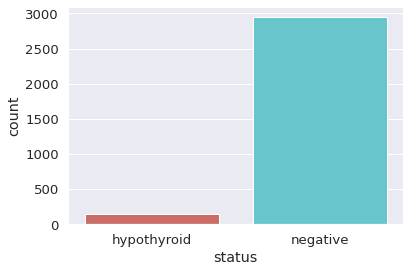

In [ ]:
#Visualizing the amount of people who tested positive for hypothyroid vs those who tested negative

sb.countplot(x='status',data=df_h, palette='hls')

The number of negative cases were way more than the positive cases.

**Bivariate Analysis**

In [ ]:
#Checking on the correlation between various variables 
#

correlation = df_h.corr()
correlation


,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,0.011063,-0.231530,-0.078763,-0.205466,0.048493,-0.098893
TSH,0.011063,1.000000,-0.160404,-0.304534,0.072900,-0.236456,-0.027072
T3,-0.231530,-0.160404,1.000000,0.521125,0.377996,0.276379,-0.019873
TT4,-0.078763,-0.304534,0.521125,1.000000,0.319429,0.679095,-0.003273
T4U,-0.205466,0.072900,0.377996,0.319429,1.000000,-0.293725,0.028359
FTI,0.048493,-0.236456,0.276379,0.679095,-0.293725,1.000000,-0.035055
TBG,-0.098893,-0.027072,-0.019873,-0.003273,0.028359,-0.035055,1.000000


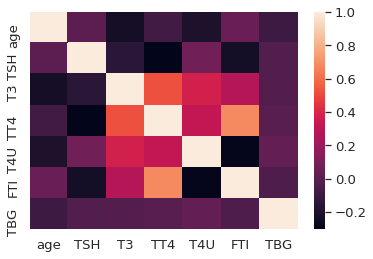

In [ ]:
#Visualizing the correlation 
sb.heatmap(df_h.corr())

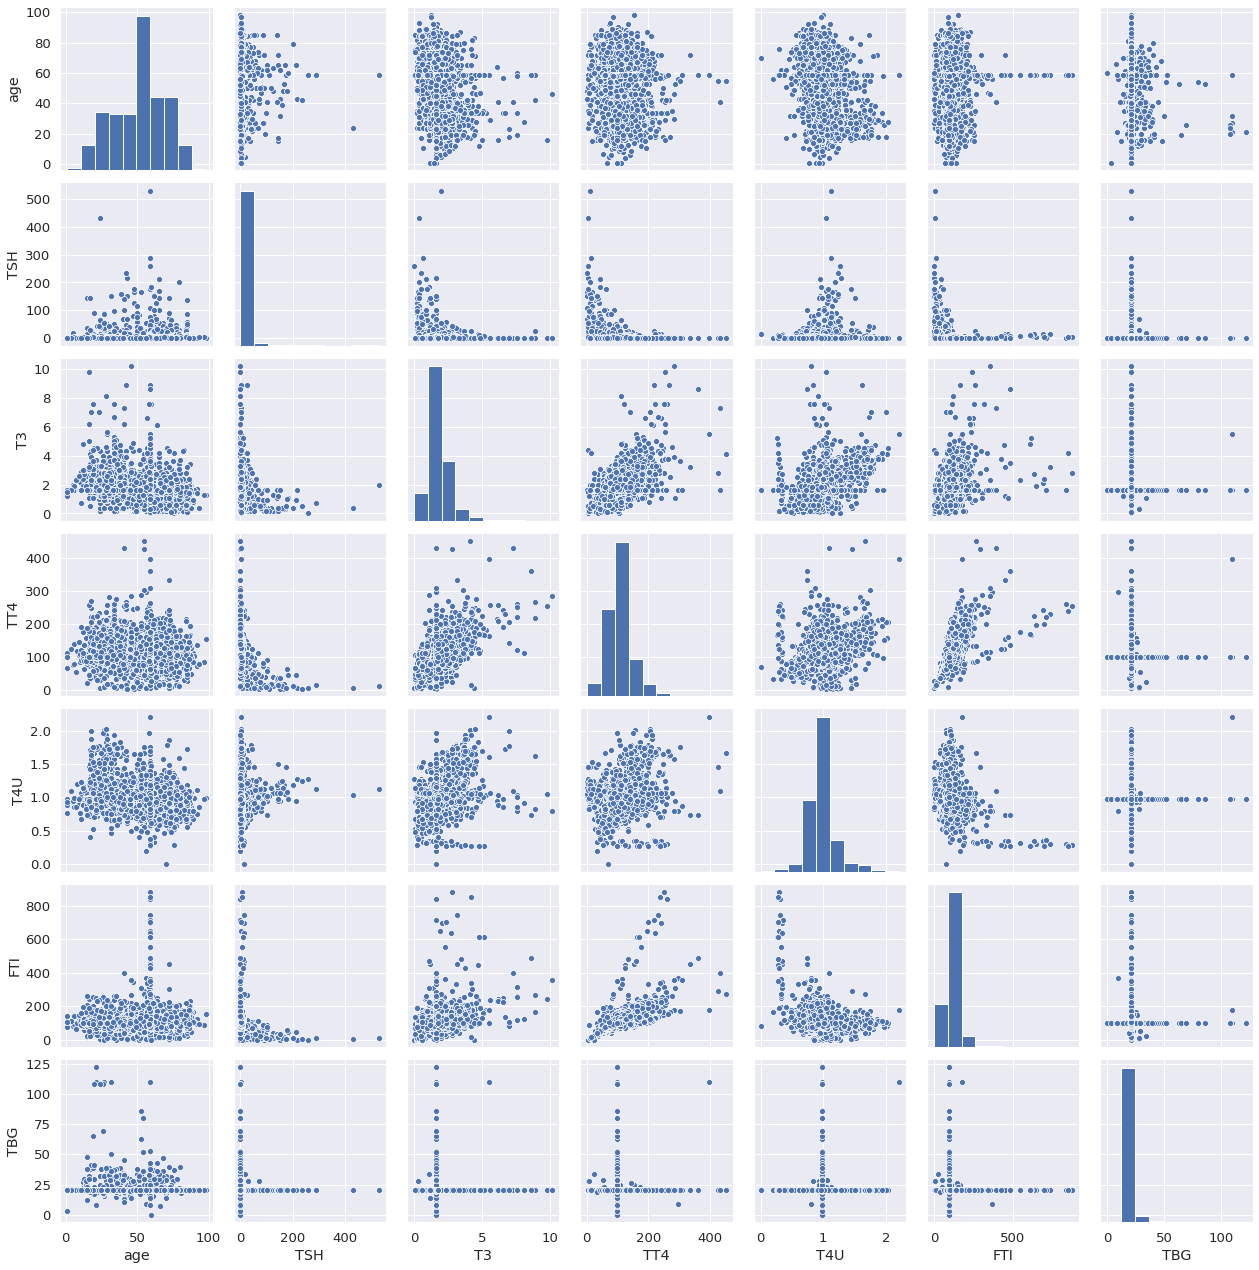

In [ ]:
#Bivariate summary of our dataset
#

sns.pairplot(df_h)
plt.show()

**Multivariate Analysis**

In [ ]:
#Encoding 
#Converting categorical variables to a dummy indicators 
#

status1 = pd.get_dummies(df_h['status'], drop_first=True)
df_h = df_h.join(status1)
df_h


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,negative
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,21.0,0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,21.0,0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,21.0,0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,21.0,0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,21.0,1
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,21.0,1
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,21.0,1
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,21.0,1


In [ ]:
gender = pd.get_dummies(df_h['sex'], drop_first=True)
df_h = df_h.join(gender)
df_h

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,negative,M
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,21.0,0,1
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,21.0,0,0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,21.0,0,1
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,21.0,0,0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,21.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,21.0,1,0
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,21.0,1,0
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,21.0,1,1
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,21.0,1,0


In [ ]:
on_thyroxine1 = pd.get_dummies(df_h['on_thyroxine'], drop_first=True)
df_h = df_h.join(on_thyroxine1)
df_h

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,negative,M,t
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,21.0,0,1,0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,21.0,0,0,1
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,21.0,0,1,0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,21.0,0,0,0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,21.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,21.0,1,0,0
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,21.0,1,0,0
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,21.0,1,1,0
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,21.0,1,0,0


In [ ]:
TSH_measured1 = pd.get_dummies(df_h['TSH_measured'], drop_first=True)
df_h = df_h.join(TSH_measured1)
df_h

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,negative,M,t,y
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,21.0,0,1,0,1
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,21.0,0,0,1,1
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,21.0,0,1,0,1
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,21.0,0,0,0,1
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,21.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,21.0,1,0,0,1
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,21.0,1,0,0,1
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,21.0,1,1,0,1
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,21.0,1,0,0,1


In [ ]:
#'status'
df_h.drop(['sex', 'on_thyroxine', 'TSH_measured', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'], axis=1,inplace=True)
df_h.head()

,status,age,TSH,T3,TT4,T4U,FTI,TBG,negative,M,t,y
0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,21.0,0,1,0,1
1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,21.0,0,0,1,1
2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,21.0,0,1,0,1
3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,21.0,0,0,0,1
4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,21.0,0,1,0,1


In [ ]:
#Changing datatype 
#

df_h[['negative']] = df_h[['negative']].astype(float)

In [ ]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   status    3086 non-null   category
 1   age       3086 non-null   float64 
 2   TSH       3086 non-null   float64 
 3   T3        3086 non-null   float64 
 4   TT4       3086 non-null   float64 
 5   T4U       3086 non-null   float64 
 6   FTI       3086 non-null   float64 
 7   TBG       3086 non-null   float64 
 8   negative  3086 non-null   float64 
 9   M         3086 non-null   uint8   
 10  t         3086 non-null   uint8   
 11  y         3086 non-null   uint8   
dtypes: category(1), float64(8), uint8(3)
memory usage: 309.1 KB


In [ ]:
#Feature selection using LDA and Discriminate Analysis 

X = df_h.iloc[ :, 0:6]
y = df_h.iloc[ :, 7]

def Factor(X, y, n, d):
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


   sc = StandardScaler()
   X_train = sc.fit_transform(X_train)
   X_test = sc.transform(X_test)

   lda = LDA(n_components=n)
   X_train = lda.fit_transform(X_train, y_train)
   X_test = lda.transform(X_test)

   classifier = RandomForestClassifier(max_depth=d, random_state=0)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)

   a = accuracy_score(y_test, y_pred)
   print('Accuracy: ' + str(a))
   def coe():
# Create an LDA object
    lda = LDA(n_components = n)
    x = lda.fit(X, y)
    model = x.transform(X)
    coeff = pd.DataFrame(index = X.columns.values, data=x.coef_[0].T)
    print(coeff.sort_values(0, ascending=True))

#***

In [ ]:
Factor(X, y, 4, 2)

Accuracy: 0.970873786407767


With the above features, our accuracy is 0.97087. I belive the above features can be considered for development of our various models. 

# Implementing the Solution

## 1. Decision trees

*   Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid
*   use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.




**Model 1 - Random forests**

In [ ]:
# Split the independent and dependent variables, training and predicting 
X = df_h.iloc[ :, 0:6]
y = df_h.iloc[ :, 7]

#Training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

#Predicting
y_pred = forest.predict(X_test)


#comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
#comparison_frame.describe()

In [ ]:
#Assessing the model's performance

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013941866933142439
Mean Squared Error: 0.004976385492525714
Root Mean Squared Error: 0.07054350071073673


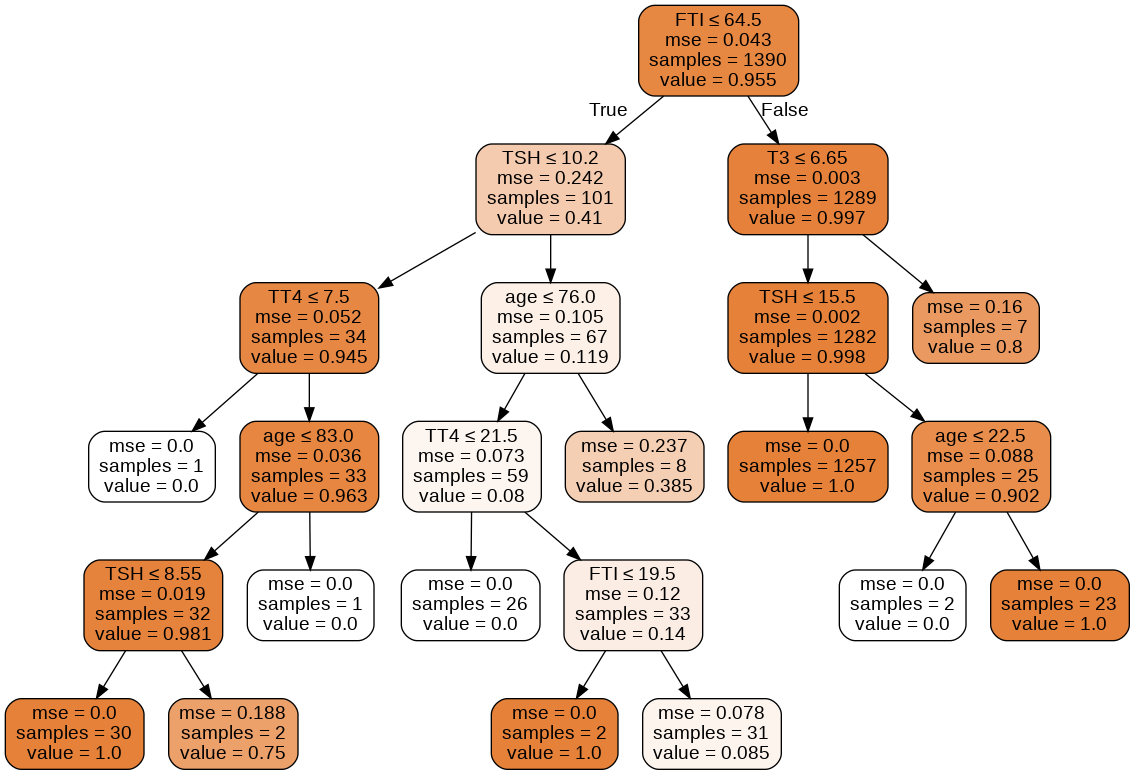

In [ ]:
#Checking what tree number 5 looks like

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[5]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())


In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

print(feature_importances) 
print()

#We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.07), ('TSH', 0.3), ('T3', 0.0), ('TT4', 0.02), ('T4U', 0.0), ('FTI', 0.62)]

Variable: FTI                  Importance: 0.62
Variable: TSH                  Importance: 0.3
Variable: age                  Importance: 0.07
Variable: TT4                  Importance: 0.02
Variable: T3                   Importance: 0.0
Variable: T4U                  Importance: 0.0


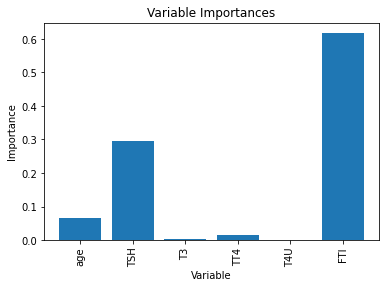

In [ ]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


**Model 2 - Ada boosted trees**

In [ ]:
#Defining X and y
#
X= df_h["FTI"]
y = df_h["TSH"]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

model = ada_boost.fit(X_train, y_train)

y_predict = model.predict(X_test)

y_predict = model.predict(X_test)



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9935275080906149


In [ ]:
conf_matrix = metrics.confusion_matrix(y_test,y_predict)
conf_matrix

array([[ 22,   3],
       [  1, 592]])

## 2. SVM

*   Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid
*   Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.



In [ ]:
#Additional libraries 
#

import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score

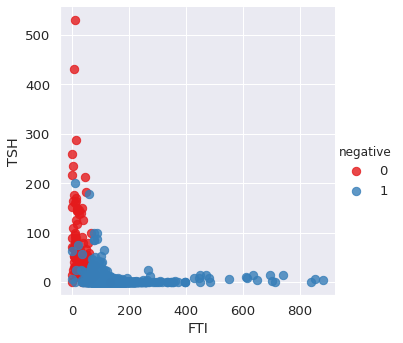

In [ ]:
#Polynomial ernel
#Linear ernel
#rbf kernel

# Plotting our desired features
sns.lmplot('FTI','TSH', data=df_h, hue='negative', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

#0 = hypothyroid
#1 = negative

In [ ]:
#Specifying the input for the model 
#

X = df_h[['FTI','TSH']].to_numpy()
df_h['negative'] = df_h['negative'].astype('category')

y = df_h['negative'].cat.codes
print(y)

model = SVC(kernel= 'linear')
clf_model = model.fit(X,y)

0       0
1       0
2       0
3       0
4       0
       ..
3158    1
3159    1
3160    1
3161    1
3162    1
Length: 3086, dtype: int8


In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=type_label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('FTI')
ax.set_xlabel('TSH')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

My colab kept on crashing!!!

In [ ]:
#Prediction
#



**Fitting the model: Polymomial function**

In [ ]:

#s = df_h.iloc[['FTI','TSH']]
#y = df_h.iloc['negative']

s = df_h.drop('negative', axis =1)
y = df_h['negative']

#s = df_h.iloc[ :, 0:6]
#y = df_h.iloc[ :, 7]

pca = PCA(n_components=2).fit(s)
X = pca.transform(s)
X.shape


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

polyclassifier = SVC(kernel='poly',degree=3,gamma='auto_derecated')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

**Fitting the model: Radial basis function (rbf)**

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Challenging the Solution

*   The first model, the Random forests had a Root Mean Squared Error: 0.07054350071073673. This is a fairly good score hence why we are satisfied with that specific model.
*   The second model, Ada Boost has an accuracy of 0.9935275080906149 which is equally a fairly good score. The model also managed to make 22 and 592 correct predictions and 3, 1 incorrect prediction respectively. 



# Follow up questions

1.   Did we have the right data? **Yes**


2.   Do we need other data to answer our question? **No**


3.   Did we have the right question? **Yes**

# Conclusion

The first model, the Random forests had a Root Mean Squared Error: 0.07054350071073673. The second model, Ada Boost has an accuracy of 0.9935275080906149, and also made 22 and 592 correct predictions and 3, 1 incorrect prediction respectively.